<img src="https://www.fao.org/images/corporatelibraries/fao-logo/fao-logo-fr.svg?sfvrsn=f64522b4_31" style="height:100px">


<center><h1><span style='color:steelblue'>Panorama de l'état de la malnutrition 2017</span> </h1></center>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
## Chargment des données

aide = pd.read_csv("aide_alimentaire.csv")
dispo_alimentaire = pd.read_csv("dispo_alimentaire.csv")
population = pd.read_csv("population.csv")
sous_nutrition = pd.read_csv("sous_nutrition.csv")

<h2><span style = "color:steelblue">0. Aperçu et Nettoyage des données</span></h2>

### Aide alimentaire

In [3]:
# Aperçu

display(aide.head())
aide.info()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


### Population

In [4]:
# Aperçu

display(population.head())
population.info()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


### Disponibilité alimentaire

In [5]:
# Aperçu

display(dispo_alimentaire.head())
dispo_alimentaire.info()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [6]:
# Remplacement des valeurs manquantes par 0

dispo_alimentaire = dispo_alimentaire.fillna(0)
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          15605 non-null  float64
 4   Autres Utilisations                                            15605 non-null  float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 15605 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         15605 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

### Sous-nutrition

In [7]:
# Aperçu

display(sous_nutrition.head())
sous_nutrition.info()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [8]:
# Vérification des pays sans valeurs 

pd.set_option('display.max_rows', None)
sous_nutrition[sous_nutrition['Valeur'].isna()].groupby('Zone').count()

,Année,Valeur
Zone,,
Allemagne,6,0
Andorre,6,0
Antigua-et-Barbuda,6,0
Argentine,1,0
Australie,6,0
Autriche,6,0
Azerbaïdjan,6,0
Bahamas,6,0
Bahreïn,6,0


In [9]:
# Remplacement des valeurs manquantes par 0

sous_nutrition = sous_nutrition.fillna(0)
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  1218 non-null   object
dtypes: object(3)
memory usage: 28.7+ KB


In [10]:
# Les valeurs de la varible 'Valeur'

sous_nutrition['Valeur'].unique()

array(['8.6', '8.8', '8.9', '9.7', '10.5', '11.1', '2.2', '2.5', '2.8',
       '3', '3.1', '3.3', '0.1', '1.3', '1.2', 0, '7.6', '6.2', '5.3',
       '5.6', '5.8', '5.7', '1.5', '1.6', '1.1', '1.7', '<0.1', '21.7',
       '22.4', '23.3', '22.3', '21.5', '20.9', '0.8', '2', '1.9', '1.8',
       '0.4', '0.5', '0.3', '0.2', '3.2', '3.4', '3.6', '3.8', '2.1',
       '2.3', '2.4', '0.6', '0.7', '0.9', '3.9', '2.7', '1.4', '4.8',
       '4.6', '4.9', '5', '4.4', '4.3', '4.2', '4.5', '26.2', '24.3',
       '21.3', '21.1', '2.9', '5.1', '5.2', '5.4', '203.8', '198.3',
       '193.1', '190.9', '190.1', '189.2', '23.6', '24', '24.1', '3.7',
       '7.3', '7.8', '8.4', '9', '9.1', '10.1', '10', '10.7', '11.5',
       '11.9', '11.8', '8.7', '10.3', '11', '1', '5.5', '6.8', '7.9',
       '5.9', '7', '9.2', '9.4', '9.6', '6.7', '7.1', '7.2', '14.7',
       '17.4', '20.2', '22.2', '22.8', '24.6', '31.1', '28.5', '25.4',
       '24.8', '26.1', '14.5', '15.4', '16.5', '15.8', '15.7', '10.8',
       '11

In [11]:
# Changement en valeurs numériques

sous_nutrition['Valeur'] = sous_nutrition['Valeur'].apply(lambda x : str(x).replace('<0.1','0.1')).astype('float')

<h2><span style='color:steelblue'> 1. Sous-nutrition 2017 </span> </h2>

### Aperçu des données utilisées

In [12]:
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [13]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


### Extraction des données de l'année 2017

In [14]:
# Vérification des différents valeurs de l'Année

sous_nutrition['Année'].value_counts()

2012-2014    203
2013-2015    203
2014-2016    203
2015-2017    203
2016-2018    203
2017-2019    203
Name: Année, dtype: int64

In [15]:
# Sélection des données de l'année 2017

sous_nutrition_2017 = sous_nutrition[sous_nutrition['Année']=='2016-2018']
sous_nutrition_2017 = sous_nutrition_2017.drop("Année",axis = 1)
sous_nutrition_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 4 to 1216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    203 non-null    object 
 1   Valeur  203 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.8+ KB


### Calcul de proportion des personnes en sous-nutrition

In [16]:
# Nombre total des personnes en sous-nutrition 2017

population_sous_nutrition_2017 = sous_nutrition_2017['Valeur'].sum()
print(f"Il y a {int(population_sous_nutrition_2017)} millions de personnes en situation de sous-nutrtion.")

Il y a 537 millions de personnes en situation de sous-nutrtion.


In [17]:
# Nombre de population 2017

population_total_2017 = round(population[population['Année']==2017]['Valeur'].sum(),2)
print(f"Il y a en total {int(population_total_2017/1000)} millions de personnes en 2017.")

Il y a en total 7548 millions de personnes en 2017.


In [18]:
# Proportion de la population en sous-nutrition

proportion_1 = round(population_sous_nutrition_2017/population_total_2017*1000,2)
print(f"Il y a {int(proportion_1*100)}% de population mondiale en sous-nutrition en 2017.")

Il y a 7% de population mondiale en sous-nutrition en 2017.


Le nombre de personne en sous nutrition en 2017 est égal à 537.7 millions.



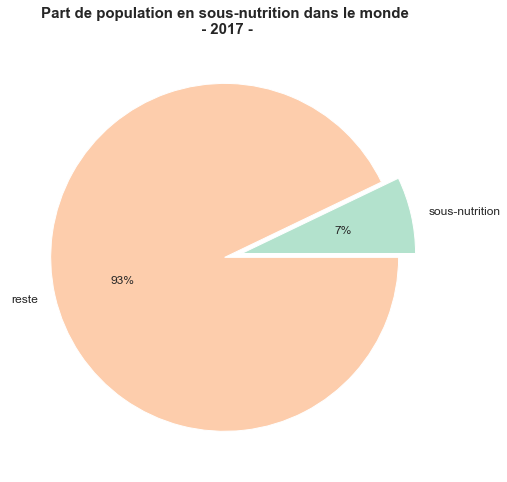

In [108]:
# Part de population en sous-nutrition

print(f"Le nombre de personne en sous nutrition en 2017 est égal à {population_sous_nutrition_2017} millions.")
print("")

plt.figure(figsize=(8,8))
plt.pie([population_sous_nutrition_2017 * 1000, population_total_2017 - population_sous_nutrition_2017 * 1000],
        labels=['sous-nutrition', 'reste'],
        explode = [0.1, 0], textprops={'fontsize': 12},
        autopct = "%.f%%", colors = sns.color_palette('Pastel2'))
plt.title("Part de population en sous-nutrition dans le monde\n - 2017 -", size = 15, fontweight="bold");

<div class="alert alert-info">
<i class="fa fa-info-circle"></i>
   Il est à prendre en compte que la proportion obtenue est une sous-estimation à cause de manque d'information liée à la sous-nutrition de quelques pays dans le monde.
</div>

### Information supplémentaire sur la sous-estimation

In [19]:
# Sous-estimation liée à l'absence de pays dans les données de sous-nutrition et aux valeurs manquantes


## pays absents

pop_absent = 0
pays_absent = []

for i in population.Zone.unique():
    if i not in(sous_nutrition_2017.Zone.unique()):
        pop_absent += population[(population.Zone==i)&(population.Année==2017)]["Valeur"].values
        pays_absent.append(i)

        
## valeurs manquantes

pop_valeur_manquante = 0
pays_valeur_manquante = []

for i in population.Zone.unique():
    if i not in (sous_nutrition_2017[sous_nutrition_2017.Valeur == 0].Zone.unique()):
        pop_valeur_manquante += population[(population.Zone==i)&(population.Année==2017)]["Valeur"].values
        pays_valeur_manquante.append(i)        
        
        
print('Il y a {} pays sans information liée à la sous-nutrition.'
      .format(len(pays_absent)+len(pays_valeur_manquante)))

print('Ces pays représentent {} millions habitants et {}% de la population mondiale de 2017.'
      .format(int(float(pop_absent/1000)+float(pop_valeur_manquante/1000)), 
              round(float((pop_absent+pop_valeur_manquante)*100/(population_total_2017)),2)))

Il y a 170 pays sans information liée à la sous-nutrition.
Ces pays représentent 4191 millions habitants et 55.53% de la population mondiale de 2017.


In [20]:
# Proportion de personnes en sous-nutrition dans les pays avec l'information de sous-nutrition

pop_valeur_present = 0

for i in sous_nutrition_2017[sous_nutrition_2017["Valeur"]>0]['Zone'].unique():
    pop_valeur_present += population[(population.Zone==i)&(population.Année==2017)]["Valeur"].values
      
proportion_2 = round(float(population_sous_nutrition_2017*1000)/float(pop_valeur_present),2)
print("Il y a {}% de population en sous-nutrition dans les pays ayant l'information de la sous-nutrition en 2017."
      .format(int(proportion_2*100)))

Il y a 13% de population en sous-nutrition dans les pays ayant l'information de la sous-nutrition en 2017.


<h2><span style='color:steelblue'> 2. Nombre de personnes qui pourront être nourries </span> </h2>

### Aperçu des données

In [21]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


### Disponibilité alimentaire (Kcal/personne/jour)

In [22]:
# Disponibilité alimentaire par pays - kcal/personne/jour

dispo_alimentaire_kcal = pd.merge(population[population['Année']==2017],
                                  dispo_alimentaire[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].groupby("Zone").sum("Disponibilité alimentaire (Kcal/personne/jour)"),
                                  on = "Zone")
dispo_alimentaire_kcal.head()

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296.113,2087.0
1,Afrique du Sud,2017,57009.756,3020.0
2,Albanie,2017,2884.169,3188.0
3,Algérie,2017,41389.189,3293.0
4,Allemagne,2017,82658.409,3503.0


In [23]:
# Calcul de disponibilité alimenatire total par pays - kcal/jour

dispo_alimentaire_kcal["Disponibilité alimentaire total"] = dispo_alimentaire_kcal['Valeur'] * 1000 * dispo_alimentaire_kcal['Disponibilité alimentaire (Kcal/personne/jour)']
dispo_alimentaire_kcal.head()

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire total
0,Afghanistan,2017,36296.113,2087.0,7.574999e+10
1,Afrique du Sud,2017,57009.756,3020.0,1.721695e+11
2,Albanie,2017,2884.169,3188.0,9.194731e+09
3,Algérie,2017,41389.189,3293.0,1.362946e+11
4,Allemagne,2017,82658.409,3503.0,2.895524e+11


In [24]:
# Disponibilité alimenatire mondial

dispo_alimentaire_mondial = dispo_alimentaire_kcal['Disponibilité alimentaire total'].sum()
print(f"Disponibilité alimentaire mondiale : {dispo_alimentaire_mondial} Kcal/jour")

Disponibilité alimentaire mondiale : 20918984627331.0 Kcal/jour


### Besoins énergetiques alimentaires

In [25]:
# Aperçu des données

besoin_alimentaire = pd.read_csv("FAOSTAT_data_fr_8-13-2022.csv")
besoin_alimentaire.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6128,Valeur,21056,Besoins énergétiques alimentaires minimaux (kc...,2017,2017,Kcal/personne/jour,1676.0,F,Estimation FAO,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6128,Valeur,21057,Besoins énergétiques alimentaires moyens (kcal...,2017,2017,Kcal/personne/jour,2134.0,F,Estimation FAO,NaN
2,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6128,Valeur,21056,Besoins énergétiques alimentaires minimaux (kc...,2017,2017,Kcal/personne/jour,1859.0,F,Estimation FAO,NaN
3,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6128,Valeur,21057,Besoins énergétiques alimentaires moyens (kcal...,2017,2017,Kcal/personne/jour,2406.0,F,Estimation FAO,NaN
4,FS,Données de la sécurité alimentaire,3,Albanie,6128,Valeur,21056,Besoins énergétiques alimentaires minimaux (kc...,2017,2017,Kcal/personne/jour,1911.0,F,Estimation FAO,NaN


In [26]:
# Besoin moyens vs besoin minimum

besoin_alimentaire.Produit.value_counts()

Besoins énergétiques alimentaires minimaux (kcal/personne/jour)    204
Besoins énergétiques alimentaires moyens (kcal/personne/jour)      204
Name: Produit, dtype: int64

In [27]:
# Extraction des données besoin moyen

besoin_alimentaire_moyen = besoin_alimentaire[besoin_alimentaire["Produit"] == "Besoins énergétiques alimentaires moyens (kcal/personne/jour)"]
besoin_alimentaire_moyen.head(3)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6128,Valeur,21057,Besoins énergétiques alimentaires moyens (kcal...,2017,2017,Kcal/personne/jour,2134.0,F,Estimation FAO,NaN
3,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6128,Valeur,21057,Besoins énergétiques alimentaires moyens (kcal...,2017,2017,Kcal/personne/jour,2406.0,F,Estimation FAO,NaN
5,FS,Données de la sécurité alimentaire,3,Albanie,6128,Valeur,21057,Besoins énergétiques alimentaires moyens (kcal...,2017,2017,Kcal/personne/jour,2490.0,F,Estimation FAO,NaN


In [28]:
# Extraction des données besoin minimum

besoin_alimentaire_mini = besoin_alimentaire[besoin_alimentaire["Produit"] == "Besoins énergétiques alimentaires minimaux (kcal/personne/jour)"]
besoin_alimentaire_mini.head(3)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6128,Valeur,21056,Besoins énergétiques alimentaires minimaux (kc...,2017,2017,Kcal/personne/jour,1676.0,F,Estimation FAO,NaN
2,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6128,Valeur,21056,Besoins énergétiques alimentaires minimaux (kc...,2017,2017,Kcal/personne/jour,1859.0,F,Estimation FAO,NaN
4,FS,Données de la sécurité alimentaire,3,Albanie,6128,Valeur,21056,Besoins énergétiques alimentaires minimaux (kc...,2017,2017,Kcal/personne/jour,1911.0,F,Estimation FAO,NaN


### Besoins énergetiques alimentaires par pays

In [29]:
# Création de tableau besoin énergetique par pays - kcal/personne/jour

besoin_pays_moyen = pd.merge(population[population['Année']==2017],
                             besoin_alimentaire_moyen[["Zone","Valeur"]],
                             on = "Zone")

besoin_pays_mini = pd.merge(population[population['Année']==2017],
                             besoin_alimentaire_mini[["Zone","Valeur"]],
                             on = "Zone")

display(besoin_pays_moyen.head(), besoin_pays_mini.head())

,Zone,Année,Valeur_x,Valeur_y
0,Afghanistan,2017,36296.113,2134.0
1,Afrique du Sud,2017,57009.756,2406.0
2,Albanie,2017,2884.169,2490.0
3,Algérie,2017,41389.189,2289.0
4,Allemagne,2017,82658.409,2545.0


,Zone,Année,Valeur_x,Valeur_y
0,Afghanistan,2017,36296.113,1676.0
1,Afrique du Sud,2017,57009.756,1859.0
2,Albanie,2017,2884.169,1911.0
3,Algérie,2017,41389.189,1781.0
4,Allemagne,2017,82658.409,1948.0


In [30]:
# Calcul de besoins énergetiques alimentaire par pays - kcal/jour

besoin_pays_moyen = besoin_pays_moyen.rename(columns = {"Valeur_x":"Population", "Valeur_y" : "Valeur"})
besoin_pays_moyen['Besoin énergetique'] = besoin_pays_moyen.Population * 1000 * besoin_pays_moyen.Valeur

besoin_pays_mini = besoin_pays_mini.rename(columns = {"Valeur_x":"Population", "Valeur_y" : "Valeur"})
besoin_pays_mini['Besoin énergetique'] = besoin_pays_mini.Population * 1000 * besoin_pays_mini.Valeur

display(besoin_pays_moyen.head(), besoin_pays_mini.head())

,Zone,Année,Population,Valeur,Besoin énergetique
0,Afghanistan,2017,36296.113,2134.0,7.745591e+10
1,Afrique du Sud,2017,57009.756,2406.0,1.371655e+11
2,Albanie,2017,2884.169,2490.0,7.181581e+09
3,Algérie,2017,41389.189,2289.0,9.473985e+10
4,Allemagne,2017,82658.409,2545.0,2.103657e+11


,Zone,Année,Population,Valeur,Besoin énergetique
0,Afghanistan,2017,36296.113,1676.0,6.083229e+10
1,Afrique du Sud,2017,57009.756,1859.0,1.059811e+11
2,Albanie,2017,2884.169,1911.0,5.511647e+09
3,Algérie,2017,41389.189,1781.0,7.371415e+10
4,Allemagne,2017,82658.409,1948.0,1.610186e+11


In [31]:
# Besoins énergetiques alimentaires de la population mondiale 2017

besoin_alimentaire_mondial_moyen = besoin_pays_moyen['Besoin énergetique'].sum()
besoin_alimentaire_mondial_mini = besoin_pays_mini['Besoin énergetique'].sum()
print(f"Besoins alimentaires moyens de la population mondiale : {besoin_alimentaire_mondial_moyen} Kcal/jour")
print(f"Besoins alimentaires minimum de la population mondiale : {besoin_alimentaire_mondial_mini} Kcal/jour")

Besoins alimentaires moyens de la population mondiale : 17664986087886.0 Kcal/jour
Besoins alimentaires minimum de la population mondiale : 13678859362238.0 Kcal/jour


In [32]:
# Besoins énergetiques alimentaires par personne 2017

besoin_alimentaire_personne_moyen = besoin_alimentaire_mondial_moyen/(population_total_2017*1000)
besoin_alimentaire_personne_mini = besoin_alimentaire_mondial_mini/(population_total_2017*1000)
print(f"Besoins alimentaires moyens par personne : {int(besoin_alimentaire_personne_moyen)} Kcal/personne/jour")
print(f"Besoins alimentaires minimum par personne : {int(besoin_alimentaire_personne_mini)} Kcal/personne/jour")

Besoins alimentaires moyens par personne : 2340 Kcal/personne/jour
Besoins alimentaires minimum par personne : 1812 Kcal/personne/jour


### Nombre théorique des personnes qui pourront être nourries

In [33]:
# Possibilité de nourrir la population de 2017

print("Les besoins alimentaires moyens sont égaux à {}% de la disponibilité alimentaire mondiale en 2017."
      .format(round(besoin_alimentaire_mondial_moyen*100/dispo_alimentaire_mondial,2)))
print("Les besoins alimentaires minimum sont égaux à {}% de la disponibilité alimentaire mondiale en 2017."
      .format(round(besoin_alimentaire_mondial_mini*100/dispo_alimentaire_mondial,2)))

Les besoins alimentaires moyens sont égaux à 84.44% de la disponibilité alimentaire mondiale en 2017.
Les besoins alimentaires minimum sont égaux à 65.39% de la disponibilité alimentaire mondiale en 2017.


In [34]:
# Nombre théorique des personnes qui pourront être nourries en 2017 - calcul avec les besoins moyens

print("Le nombre théorique des personnes qui pourront être nourries en 2017 est de {} millions."
      .format(int(dispo_alimentaire_mondial/besoin_alimentaire_personne_moyen/1000000)))
print("Nous pouvons nourrir {}% de la population mondiale en 2017."
      .format(int(dispo_alimentaire_mondial/besoin_alimentaire_personne_moyen/(population_total_2017*1000)*100)))

Le nombre théorique des personnes qui pourront être nourries en 2017 est de 8938 millions.
Nous pouvons nourrir 118% de la population mondiale en 2017.


In [35]:
# Nombre théorique des personnes qui pourront être nourries en 2017 - calcul avec les besoins minimum

print("Le nombre théorique des personnes qui pourront être nourries en 2017 est de {} millions."
      .format(int(dispo_alimentaire_mondial/besoin_alimentaire_personne_mini/1000000)))
print("Nous pouvons nourrir {}% de la population mondiale en 2017."
      .format(int(dispo_alimentaire_mondial/besoin_alimentaire_personne_mini/(population_total_2017*1000)*100)))

Le nombre théorique des personnes qui pourront être nourries en 2017 est de 11543 millions.
Nous pouvons nourrir 152% de la population mondiale en 2017.


<h2><span style="color:steelblue"> 3. Disponibilité alimentaire des produits végétaux </span></h2>

### Extraction des produits végétaux

In [36]:
# Aperçu de disponibilité alimentaire

dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Vérification différentes origines des produits

dispo_alimentaire.Origine.value_counts()

vegetale    11896
animale      3709
Name: Origine, dtype: int64

In [38]:
# Extraction des produits végétaux

dispo_vegetal = dispo_alimentaire[dispo_alimentaire['Origine']=="vegetale"]
dispo_vegetal.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0


### Calcul de disponibilité des produits végétaux

In [39]:
# Disponibilité par personne par pays - kcal/personne/jour

dispo_alimentaire_veg = dispo_vegetal[["Zone", "Disponibilité alimentaire (Kcal/personne/jour)"]].groupby("Zone").sum("Disponibilité alimentaire (Kcal/personne/jour)").reset_index()
dispo_alimentaire_veg.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,1871.0
1,Afrique du Sud,2533.0
2,Albanie,2203.0
3,Algérie,2915.0
4,Allemagne,2461.0


In [40]:
# Disponibilité total des produits végétaux par pays - kcal/jour

dispo_alimentaire_veg = pd.merge(population[population["Année"]==2017], dispo_alimentaire_veg, on = "Zone")
dispo_alimentaire_veg["Disponibilité alimentaire totale"] = dispo_alimentaire_veg["Valeur"] * 1000 * dispo_alimentaire_veg["Disponibilité alimentaire (Kcal/personne/jour)"]
dispo_alimentaire_veg.head()

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire totale
0,Afghanistan,2017,36296.113,1871.0,6.791003e+10
1,Afrique du Sud,2017,57009.756,2533.0,1.444057e+11
2,Albanie,2017,2884.169,2203.0,6.353824e+09
3,Algérie,2017,41389.189,2915.0,1.206495e+11
4,Allemagne,2017,82658.409,2461.0,2.034223e+11


In [41]:
# Disponibilité mondiale totale des produits végétaux

dispo_alimentaire_veg_total = dispo_alimentaire_veg["Disponibilité alimentaire totale"].sum()
print(f"Besoin alimentaire mondial des produits végétaux : {int(dispo_alimentaire_veg_total)} Kcal/personne/jour")

Besoin alimentaire mondial des produits végétaux : 17260764211501 Kcal/personne/jour


### Nombre théorique des personnes qui pourront être nourries avec les produits végétaux

In [42]:
# Nombre de personnes qui pourront être nourries avec les produits végétaux - calcul avec besoins moyens

print("Le nombre de personne qui peuvent être nourries avec les produits végétaux est de {} millions."
      .format(int(dispo_alimentaire_veg_total/besoin_alimentaire_personne_moyen/1000000)))
print("Les produits végétaux peuvent nourrir {}% de la population mondiale."
      .format(int(dispo_alimentaire_veg_total/besoin_alimentaire_personne_moyen/(population_total_2017*1000)*100)))

Le nombre de personne qui peuvent être nourries avec les produits végétaux est de 7375 millions.
Les produits végétaux peuvent nourrir 97% de la population mondiale.


In [43]:
# Nombre de personnes qui pourront être nourries avec les produits végétaux - calcul avec besoins minimum

print("Le nombre de personne qui peuvent être nourries avec les produits végétaux est de {} millions."
      .format(int(dispo_alimentaire_veg_total/besoin_alimentaire_personne_mini/1000000)))
print("Les produits végétaux peuvent nourrir {}% de la population mondiale."
      .format(int(dispo_alimentaire_veg_total/besoin_alimentaire_personne_mini/(population_total_2017*1000)*100)))

Le nombre de personne qui peuvent être nourries avec les produits végétaux est de 9524 millions.
Les produits végétaux peuvent nourrir 126% de la population mondiale.


### Proportion de disponibilité selon l'origine de produit

In [44]:
# Extraction des données liées à la disponibilité alimentaire 

dispo_categorie = dispo_alimentaire[["Zone","Origine","Disponibilité alimentaire (Kcal/personne/jour)"]].groupby(["Zone","Origine"]).sum("Disponibilité alimentaire (Kcal/personne/jour)").reset_index()
dispo_categorie.head()

,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,animale,216.0
1,Afghanistan,vegetale,1871.0
2,Afrique du Sud,animale,487.0
3,Afrique du Sud,vegetale,2533.0
4,Albanie,animale,985.0


In [45]:
# Calcul de disponibilité totale par pays

dispo_categorie = pd.merge(population[population['Année']==2017], dispo_categorie, on = "Zone")
dispo_categorie["Disponibilité totale"] = dispo_categorie["Valeur"] * 1000 * dispo_categorie["Disponibilité alimentaire (Kcal/personne/jour)"]
dispo_categorie.head()

,Zone,Année,Valeur,Origine,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité totale
0,Afghanistan,2017,36296.113,animale,216.0,7.839960e+09
1,Afghanistan,2017,36296.113,vegetale,1871.0,6.791003e+10
2,Afrique du Sud,2017,57009.756,animale,487.0,2.776375e+10
3,Afrique du Sud,2017,57009.756,vegetale,2533.0,1.444057e+11
4,Albanie,2017,2884.169,animale,985.0,2.840906e+09


In [46]:
# Proportion de disponibilité selon l'origine de produit

dispo_categorie = dispo_categorie[['Origine','Disponibilité totale']].groupby("Origine").sum("Disponibilité totale").reset_index()
dispo_categorie['Proportion'] = round(dispo_categorie['Disponibilité totale']/dispo_categorie["Disponibilité totale"].sum()*100,2)
dispo_categorie

,Origine,Disponibilité totale,Proportion
0,animale,3.658220e+12,17.49
1,vegetale,1.726076e+13,82.51


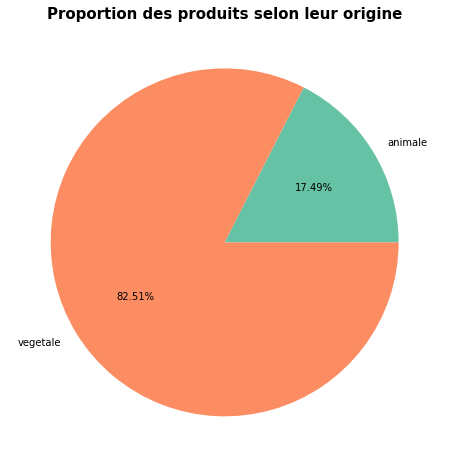

In [47]:
# Visualisation

plt.figure(figsize=(8,8))
plt.pie(dispo_categorie.Proportion, labels = dispo_categorie.Origine, autopct = '%.2f%%', colors = sns.color_palette("Set2"))
plt.title('Proportion des produits selon leur origine', size = 15, fontweight = 'bold');

<h2><span style="color:steelblue">4. Utilisation de disponibilité intérieure</span></h2>

### Liens entre les variables

In [48]:
print("disponibilité intérieure = production + importation - exportation + variation de stock")
print("disponibilité intérieure = nourriture + aliments pour animaux + semences + autre utilisations + pertes + traitement")

disponibilité intérieure = production + importation - exportation + variation de stock
disponibilité intérieure = nourriture + aliments pour animaux + semences + autre utilisations + pertes + traitement


In [49]:
# Vérification du lien 1 (production + commerce international)

dispo1 = dispo_alimentaire[["Zone","Produit","Origine","Disponibilité intérieure", "Production", 
                            "Exportations - Quantité", "Importations - Quantité", "Variation de stock"]]
dispo1 = dispo1.fillna(0)
dispo1["Formule"] = dispo1["Production"] + dispo1["Importations - Quantité"] - dispo1["Exportations - Quantité"] + dispo1["Variation de stock"]
dispo1["Check"] = dispo1["Disponibilité intérieure"] == dispo1["Formule"]
dispo1.head()

,Zone,Produit,Origine,Disponibilité intérieure,Production,Exportations - Quantité,Importations - Quantité,Variation de stock,Formule,Check
0,Afghanistan,Abats Comestible,animale,53.0,53.0,0.0,0.0,0.0,53.0,True
1,Afghanistan,"Agrumes, Autres",vegetale,41.0,3.0,2.0,40.0,0.0,41.0,True
2,Afghanistan,Aliments pour enfants,vegetale,2.0,0.0,0.0,2.0,0.0,2.0,True
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.0,0.0,0.0,True
4,Afghanistan,Bananes,vegetale,82.0,0.0,0.0,82.0,0.0,82.0,True


In [50]:
# Résultat de vérification du lien 1

dispo1.Check.value_counts()

True     12998
False     2607
Name: Check, dtype: int64

In [51]:
# Vérification du lien 2 (utilisation intérieure)

dispo2 = dispo_alimentaire[["Zone","Produit","Origine","Disponibilité intérieure", "Aliments pour animaux", 
                            "Autres Utilisations", "Nourriture", "Semences", "Pertes", "Traitement"]]
dispo2 = dispo2.fillna(0)
dispo2["Formule"] = dispo2["Aliments pour animaux"] + dispo2["Autres Utilisations"] + dispo2["Nourriture"] - dispo2["Semences"] + dispo2["Pertes"] + dispo2["Traitement"]
dispo2["Check"] = dispo2["Disponibilité intérieure"] == dispo2["Formule"]
dispo2.head()

,Zone,Produit,Origine,Disponibilité intérieure,Aliments pour animaux,Autres Utilisations,Nourriture,Semences,Pertes,Traitement,Formule,Check
0,Afghanistan,Abats Comestible,animale,53.0,0.0,0.0,53.0,0.0,0.0,0.0,53.0,True
1,Afghanistan,"Agrumes, Autres",vegetale,41.0,0.0,0.0,39.0,0.0,2.0,0.0,41.0,True
2,Afghanistan,Aliments pour enfants,vegetale,2.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,True
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
4,Afghanistan,Bananes,vegetale,82.0,0.0,0.0,82.0,0.0,0.0,0.0,82.0,True


In [52]:
# Résultat de vérification du lien 2 

dispo2.Check.value_counts()

True     12598
False     3007
Name: Check, dtype: int64

In [53]:
# Différence entre la disponibilité intérieure - utilisation de la disponibilité intérieure

dispo2[dispo2["Check"]==False][["Zone","Produit","Origine","Disponibilité intérieure","Formule","Check"]]

,Zone,Produit,Origine,Disponibilité intérieure,Formule,Check
7,Afghanistan,Blé,vegetale,5992.0,5348.0,False
17,Afghanistan,Graines de coton,vegetale,27.0,25.0,False
29,Afghanistan,Lait - Excl Beurre,animale,2083.0,2082.0,False
31,Afghanistan,Légumineuses Autres,vegetale,86.0,76.0,False
32,Afghanistan,Maïs,vegetale,313.0,302.0,False
37,Afghanistan,Oeufs,animale,47.0,43.0,False
38,Afghanistan,Olives,vegetale,7.0,6.0,False
40,Afghanistan,Orge,vegetale,524.0,479.0,False
41,Afghanistan,"Plantes Oleiferes, Autre",vegetale,3.0,2.0,False
45,Afghanistan,Pommes de Terre,vegetale,262.0,216.0,False


In [54]:
# La différence entre 'disponibilité intérieure' vs 'somme des différente utilisation de disponibilité intérieure'

print("La différence est à l'ordre de {}% de la valeur totale.".format(int((dispo2["Disponibilité intérieure"] - dispo2["Formule"]).sum()*100/dispo2["Disponibilité intérieure"].sum())))

La différence est à l'ordre de 3% de la valeur totale.


### Aperçu des données

In [55]:
# Données liées à l'utilisation de la disponibilité intérieure

dispo2.head()

,Zone,Produit,Origine,Disponibilité intérieure,Aliments pour animaux,Autres Utilisations,Nourriture,Semences,Pertes,Traitement,Formule,Check
0,Afghanistan,Abats Comestible,animale,53.0,0.0,0.0,53.0,0.0,0.0,0.0,53.0,True
1,Afghanistan,"Agrumes, Autres",vegetale,41.0,0.0,0.0,39.0,0.0,2.0,0.0,41.0,True
2,Afghanistan,Aliments pour enfants,vegetale,2.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,True
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
4,Afghanistan,Bananes,vegetale,82.0,0.0,0.0,82.0,0.0,0.0,0.0,82.0,True


### Calcul de la proportion de différent usage

In [56]:
# Proportion d'usage

dispo_usage = dispo2.iloc[:,4:10].sum()*100/dispo2.iloc[:,4:10].sum().sum()
dispo_usage.sort_values(ascending = False)

Nourriture               49.462012
Traitement               22.363102
Aliments pour animaux    13.229526
Autres Utilisations       8.774306
Pertes                    4.602057
Semences                  1.568997
dtype: float64

### Visualisation

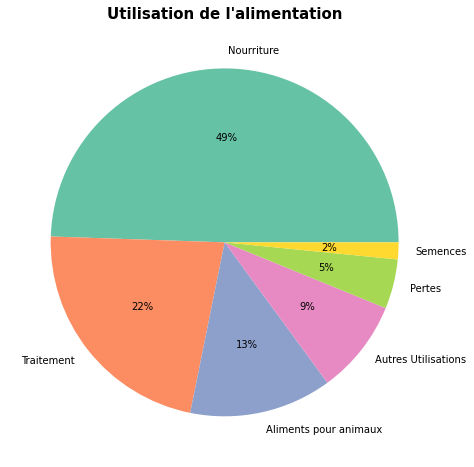

In [57]:
# Visualisation

plt.figure(figsize=(8,8))
plt.pie(dispo_usage.sort_values(ascending = False), labels=dispo_usage.sort_values(ascending = False).index, 
        autopct = "%.f%%", colors = sns.color_palette('Set2'))
plt.title("Utilisation de l'alimentation", size = 15, fontweight="bold");

<h2><span style="color:steelblue">5. Utilisation actuelle de l'alimentation et la nourriture des personnes </span></h2>

In [58]:
# Disponibilité alimentaire nourriture

dispo_alimentaire_nourriture = dispo_alimentaire[["Zone","Produit","Disponibilité alimentaire (Kcal/personne/jour)", "Disponibilité intérieure", "Nourriture"]]
dispo_alimentaire_nourriture.head()

,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Nourriture
0,Afghanistan,Abats Comestible,5.0,53.0,53.0
1,Afghanistan,"Agrumes, Autres",1.0,41.0,39.0
2,Afghanistan,Aliments pour enfants,1.0,2.0,2.0
3,Afghanistan,Ananas,0.0,0.0,0.0
4,Afghanistan,Bananes,4.0,82.0,82.0


In [64]:
# Calcul de la disponibilité alimentaire nourriture en kcal/personne/jour

dispo_alimentaire_nourriture['Part de nourriture (Kcal/personne/jour)'] = round(dispo_alimentaire_nourriture['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_alimentaire_nourriture["Nourriture"]/dispo_alimentaire_nourriture["Disponibilité intérieure"],0)
dispo_alimentaire_nourriture = dispo_alimentaire_nourriture.groupby("Zone").sum().reset_index()
dispo_alimentaire_nourriture.head()

,Zone,Année_x,Valeur_x,Année_y,Valeur_y,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Nourriture,Part de nourriture (Kcal/personne/jour),Part de nourriture totale
0,Afghanistan,2017,36296.113,2017,36296.113,2087.0,13515.0,10735.0,1658.0,6.301005e+10
1,Afrique du Sud,2017,57009.756,2017,57009.756,3020.0,61256.0,29812.0,1470.0,1.391038e+11
2,Albanie,2017,2884.169,2017,2884.169,3188.0,4758.0,3476.0,2329.0,7.250801e+09
3,Algérie,2017,41389.189,2017,41389.189,3293.0,42630.0,31729.0,2451.0,1.085638e+11
4,Allemagne,2017,82658.409,2017,82658.409,3503.0,162275.0,79238.0,1710.0,2.097044e+11


In [65]:
# Calcul de la disponibilité alimentaire nourriture en kcal/jour/pays

dispo_alimentaire_nourriture = pd.merge(population[population["Année"]==2017], dispo_alimentaire_nourriture, on = "Zone")
dispo_alimentaire_nourriture["Part de nourriture totale"] = round(dispo_alimentaire_nourriture["Valeur"] * 1000 * dispo_alimentaire_nourriture["Part de nourriture (Kcal/personne/jour)"],0)
dispo_alimentaire_nourriture.head()

,Zone,Année,Valeur,Année_x,Valeur_x,Année_y,Valeur_y,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Nourriture,Part de nourriture (Kcal/personne/jour),Part de nourriture totale
0,Afghanistan,2017,36296.113,2017,36296.113,2017,36296.113,2087.0,13515.0,10735.0,1658.0,6.017896e+10
1,Afrique du Sud,2017,57009.756,2017,57009.756,2017,57009.756,3020.0,61256.0,29812.0,1470.0,8.380434e+10
2,Albanie,2017,2884.169,2017,2884.169,2017,2884.169,3188.0,4758.0,3476.0,2329.0,6.717230e+09
3,Algérie,2017,41389.189,2017,41389.189,2017,41389.189,3293.0,42630.0,31729.0,2451.0,1.014449e+11
4,Allemagne,2017,82658.409,2017,82658.409,2017,82658.409,3503.0,162275.0,79238.0,1710.0,1.413459e+11


In [66]:
# Le part de population mondiale qui être nourrie avec l'utilisation alimentaire actuelle - besoins moyens

print("Avec utilisation actuelle de l'alimentation, le part destiné à la nourriture humaine ne peut nourrir que {}% de la population mondiale."
      .format(int(dispo_alimentaire_nourriture['Part de nourriture totale']
                  .sum()*100/besoin_alimentaire_personne_moyen/(population_total_2017*1000))))

Avec utilisation actuelle de l'alimentation, le part destiné à la nourriture humaine ne peut nourrir que 65% de la population mondiale.


In [67]:
# Le part de population mondiale qui être nourrie avec l'utilisation alimentaire actuelle - besoins minimum

print("Avec utilisation actuelle de l'alimentation, le part destiné à la nourriture humaine ne peut nourrir que {}% de la population mondiale."
      .format(int(dispo_alimentaire_nourriture['Part de nourriture totale'].sum()*100/besoin_alimentaire_personne_mini
              /(population_total_2017*1000))))

Avec utilisation actuelle de l'alimentation, le part destiné à la nourriture humaine ne peut nourrir que 84% de la population mondiale.


<h2><span style="color:steelblue">6. Focus Céréales</span></h2>

### Vérification la catégorie des produits

In [68]:
# Catégorie de produits dans les données de disponibilité alimentaire

categorie = list(dispo_alimentaire.Produit.unique())
sorted(categorie)

['Abats Comestible',
 'Agrumes, Autres',
 'Alcool, non Comestible',
 'Aliments pour enfants',
 'Ananas',
 'Animaux Aquatiques Autre',
 'Arachides Decortiquees',
 'Avoine',
 'Bananes',
 'Bananes plantains',
 'Beurre, Ghee',
 'Bière',
 'Blé',
 'Boissons Alcooliques',
 'Boissons Fermentés',
 'Café',
 'Cephalopodes',
 'Citrons & Limes',
 'Coco (Incl Coprah)',
 'Crustacés',
 'Crème',
 'Céréales, Autres',
 'Dattes',
 'Edulcorants Autres',
 'Feve de Cacao',
 'Fruits, Autres',
 'Girofles',
 'Graines Colza/Moutarde',
 'Graines de coton',
 'Graines de tournesol',
 'Graisses Animales Crue',
 'Haricots',
 'Huil Plantes Oleif Autr',
 'Huile Graines de Coton',
 "Huile d'Arachide",
 "Huile d'Olive",
 'Huile de Coco',
 'Huile de Colza&Moutarde',
 'Huile de Germe de Maïs',
 'Huile de Palme',
 'Huile de Palmistes',
 'Huile de Soja',
 'Huile de Son de Riz',
 'Huile de Sésame',
 'Huile de Tournesol',
 'Huiles de Foie de Poisso',
 'Huiles de Poissons',
 'Ignames',
 'Lait - Excl Beurre',
 'Légumes, Autres',

### Extraction des produits céréales

In [69]:
# La liste des céréales

liste = pd.read_csv("FAOSTAT_data_fr_8-12-2022.csv")
liste.Produit.unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres'],
      dtype=object)

In [70]:
# Création de liste des céréales

liste_cereales = ["Maïs","Blé","Riz (Eq Blanchi)","Orge","Céréales","Avoine","Siegle","Sorgho","Millet"]

In [71]:
# Extraction des données liées aux produits céréales

dispo_cereales = dispo2[dispo2["Produit"].isin(liste_cereales)]
dispo_cereales.head()

,Zone,Produit,Origine,Disponibilité intérieure,Aliments pour animaux,Autres Utilisations,Nourriture,Semences,Pertes,Traitement,Formule,Check
7,Afghanistan,Blé,vegetale,5992.0,0.0,0.0,4895.0,322.0,775.0,0.0,5348.0,False
32,Afghanistan,Maïs,vegetale,313.0,200.0,0.0,76.0,5.0,31.0,0.0,302.0,False
34,Afghanistan,Millet,vegetale,13.0,0.0,0.0,12.0,0.0,1.0,0.0,13.0,True
40,Afghanistan,Orge,vegetale,524.0,360.0,0.0,89.0,22.0,52.0,0.0,479.0,False
47,Afghanistan,Riz (Eq Blanchi),vegetale,461.0,0.0,0.0,422.0,14.0,24.0,0.0,432.0,False


### Calcul de la proportion d'usage des produits céréales

In [72]:
# Proportion d'usage

cereales_usage = dispo_cereales.iloc[:,4:10].sum()*100/dispo_cereales.iloc[:,4:10].sum().sum()
cereales_usage.sort_values(ascending=False)

Nourriture               43.086446
Aliments pour animaux    35.817113
Autres Utilisations       9.875889
Pertes                    4.475991
Traitement                3.948553
Semences                  2.796008
dtype: float64

### Visualisation

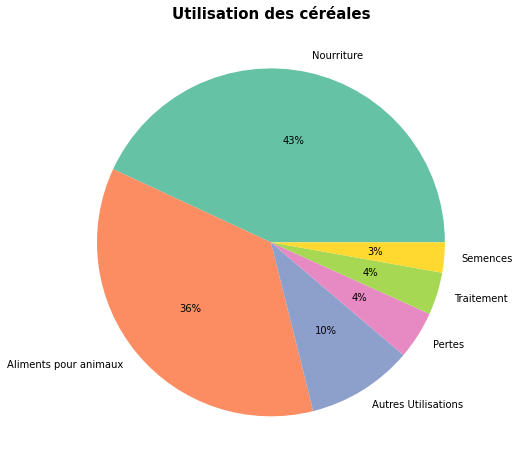

In [73]:
# Visualisation

plt.figure(figsize=(8,8))
plt.pie(cereales_usage.sort_values(ascending=False), labels=cereales_usage.sort_values(ascending=False).index, 
        autopct = "%.f%%", colors = sns.color_palette('Set2'))
plt.title("Utilisation des céréales", size = 15, fontweight="bold");

<h2><span style="color:steelblue">7. Manioc en Thailande </span></h2>

### Extraction des données manioc en Thailande

In [74]:
# Extraction des données correspondantes

manioc_thailand = dispo_alimentaire[(dispo_alimentaire['Produit']=='Manioc') & (dispo_alimentaire['Zone']=="Thaïlande")]
manioc_thailand

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,0.0,0.0,0.0


In [75]:
# Proportion commerce manioc

manioc_thai_commerce = manioc_thailand[["Production","Exportations - Quantité",
                                        "Importations - Quantité", "Variation de stock"]]
manioc_thai_commerce

,Production,Exportations - Quantité,Importations - Quantité,Variation de stock
13809,30228.0,25214.0,1250.0,0.0


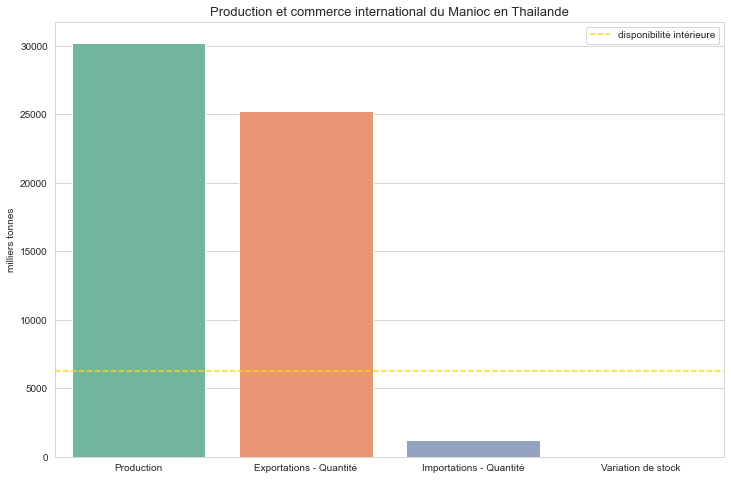

In [109]:
# Visualisation

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
sns.set_style('whitegrid')
sns.barplot(x = manioc_thai_commerce.columns, y = manioc_thai_commerce.iloc[0], palette='Set2')
ax.axhline(manioc_thailand["Disponibilité intérieure"].values, ls='--', color = 'gold', 
           label ='disponibilité intérieure')
ax.set_ylabel("milliers tonnes")
ax.set_title("Production et commerce international du Manioc en Thailande", size = 13)
ax.legend();

In [77]:
# Comparaison avec la disponibilité intérieure

print("La production de manioc en Thailande est {}% de la disponibilité intérieure."
      .format(int(manioc_thai_commerce.Production/manioc_thailand["Disponibilité intérieure"]*100)))

print("Le pays exporte {}% de sa disponibilité intérieure de manioc."
      .format(int(manioc_thai_commerce["Exportations - Quantité"]/manioc_thailand["Disponibilité intérieure"]*100)))

print("Le pays importe {}% de sa disponibilité intérieure de manioc."
      .format(int(manioc_thai_commerce["Importations - Quantité"]/manioc_thailand["Disponibilité intérieure"]*100)))

La production de manioc en Thailande est 482% de la disponibilité intérieure.
Le pays exporte 402% de sa disponibilité intérieure de manioc.
Le pays importe 19% de sa disponibilité intérieure de manioc.


Le nombre de personne en sous nutrition en Thailande est égal à 6.2 millions.



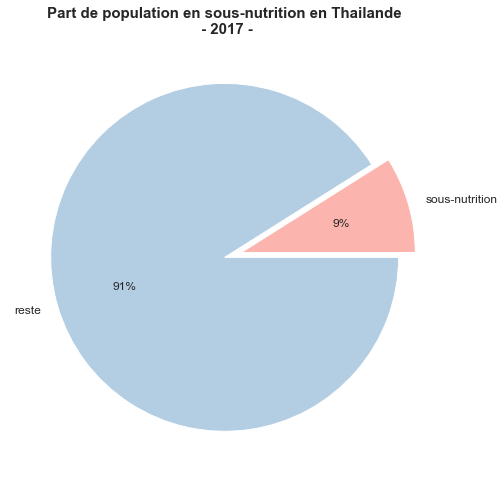

In [111]:
# Part de population en sous-nutrition en Thailande

sous_nutrition_thai = sous_nutrition[(sous_nutrition['Zone']=="Thaïlande") & (sous_nutrition['Année']=="2016-2018")].Valeur.sum()
population_thai_2017 = int(population[(population.Année == 2017) & (population.Zone == "Thaïlande")].Valeur)

print(f"Le nombre de personne en sous nutrition en Thailande est égal à {sous_nutrition_thai} millions.")
print("")

plt.figure(figsize=(8,8))
plt.pie([sous_nutrition_thai * 1000, population_thai_2017 - sous_nutrition_thai * 1000],
        labels=['sous-nutrition', 'reste'],
        explode = [0.1, 0], textprops={'fontsize': 12},
        autopct = "%.f%%", colors = sns.color_palette('Pastel1'))
plt.title("Part de population en sous-nutrition en Thailande\n - 2017 -", size = 15, fontweight="bold");

In [79]:
# Besoins énergetiques alimentaires en Thailande

besoin_alimentaire_thai = besoin_alimentaire[(besoin_alimentaire['Zone']=="Thaïlande") & 
                                             (besoin_alimentaire['Produit']=="Besoins énergétiques alimentaires moyens (kcal/personne/jour)")][["Zone","Valeur"]]
print("Les besoins moyens énergetiques alimentaires journaliers thailandais sont de {} kcal par personne."
      .format(int(besoin_alimentaire_thai.Valeur)))

Les besoins moyens énergetiques alimentaires journaliers thailandais sont de 2445 kcal par personne.


In [80]:
# Valeur énergetique de manioc

energie_manioc = manioc_thailand["Disponibilité alimentaire (Kcal/personne/jour)"] * 365 / manioc_thailand["Disponibilité alimentaire en quantité (kg/personne/an)"]
print(f"La valeur énergetique de manioc par kg est égal à {int(energie_manioc.sum())} kcal/pesonne/jour.")

valeur_energie_pro = manioc_thai_commerce["Production"] * 1000000 * energie_manioc.sum()
print(f"La valeur énergetique de manioc produit est de {valeur_energie_pro.sum()} kcal/an.")

La valeur énergetique de manioc par kg est égal à 1123 kcal/pesonne/jour.
La valeur énergetique de manioc produit est de 33948369230769.23 kcal/an.


In [81]:
# Possibilité de nourir les personnes en sous-alimentation par la quantité exportée

valeur_energie_exp = manioc_thai_commerce["Exportations - Quantité"] * 1000000 * energie_manioc.sum()
print(f"La valeur énergetique de manioc exporté est de {valeur_energie_exp.sum()} kcal/an.")
print(f"Le manioc exporté peut nourir {int(valeur_energie_exp.sum()/energie_manioc.sum()/365/1000000)} millions de personnes d'en plus.")
print(f"Ce nombre est égal à {int(valeur_energie_exp.sum()/energie_manioc.sum()/365/1000000/(sous_nutrition_thai))} fois plus que la population en sous-nutrition dans le pays.")

La valeur énergetique de manioc exporté est de 28317261538461.54 kcal/an.
Le manioc exporté peut nourir 69 millions de personnes d'en plus.
Ce nombre est égal à 11 fois plus que la population en sous-nutrition dans le pays.


<h2><span style="color:steelblue">8. Situation des pays </span></h2>

### Situation de sous-alimentation par pays

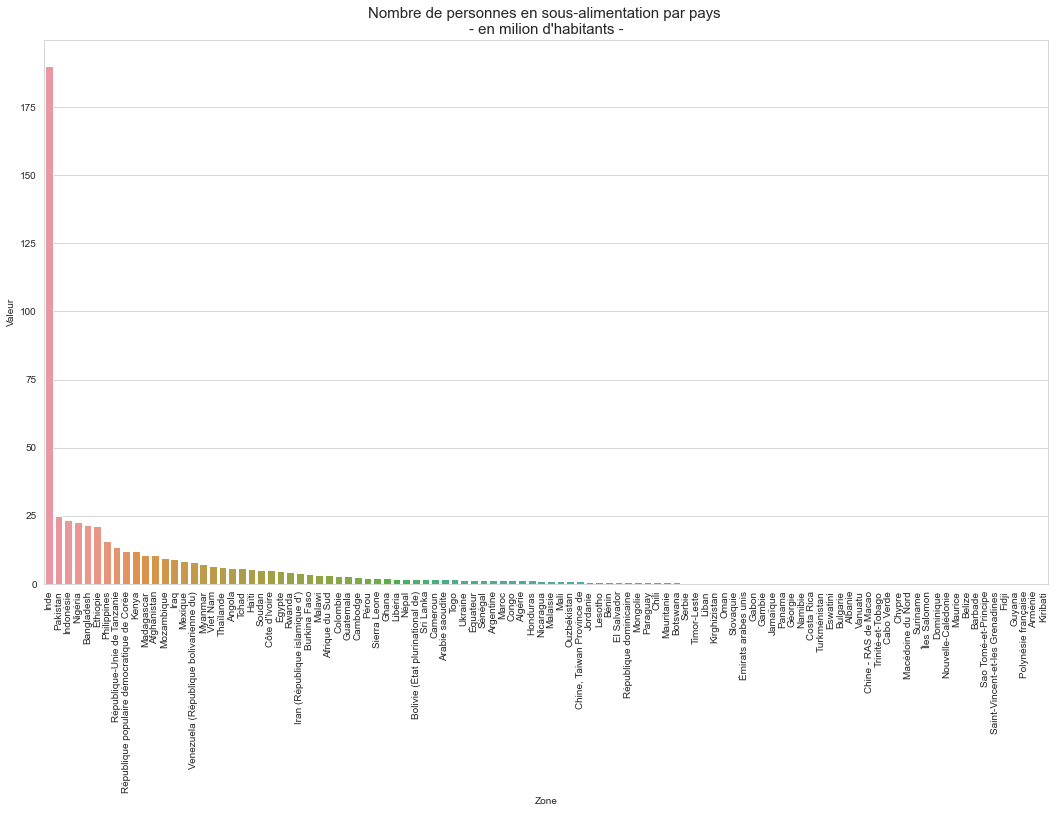

In [82]:
# Sous-alimentation de chaque pays

plt.figure(figsize=(18,10))
sns.set_style('whitegrid')
sns.barplot(x = 'Zone', y = 'Valeur', 
            data = sous_nutrition_2017[sous_nutrition_2017.Valeur>0].sort_values(by="Valeur", ascending=False))
plt.xticks(rotation=90)
plt.title("Nombre de personnes en sous-alimentation par pays \n- en milion d'habitants -", size= 15);

In [83]:
# Pourcentage de la population en sous-nutrition

population_malnutrition = pd.merge(population[population["Année"]==2017], 
                                   sous_nutrition_2017[sous_nutrition_2017["Valeur"]>0.1], on = "Zone")
population_malnutrition["Valeur_y"] = population_malnutrition["Valeur_y"] * 1000
population_malnutrition["% en sous-nutrition"] = round(population_malnutrition.Valeur_y*100/population_malnutrition.Valeur_x,2)
population_malnutrition = population_malnutrition.rename(columns = {"Valeur_x":"Population", "Valeur_y":"En sous-nutrition"})
population_malnutrition.head()

,Zone,Année,Population,En sous-nutrition,% en sous-nutrition
0,Afghanistan,2017,36296.113,10500.0,28.93
1,Afrique du Sud,2017,57009.756,3100.0,5.44
2,Algérie,2017,41389.189,1300.0,3.14
3,Angola,2017,29816.766,5800.0,19.45
4,Arabie saoudite,2017,33101.179,1600.0,4.83


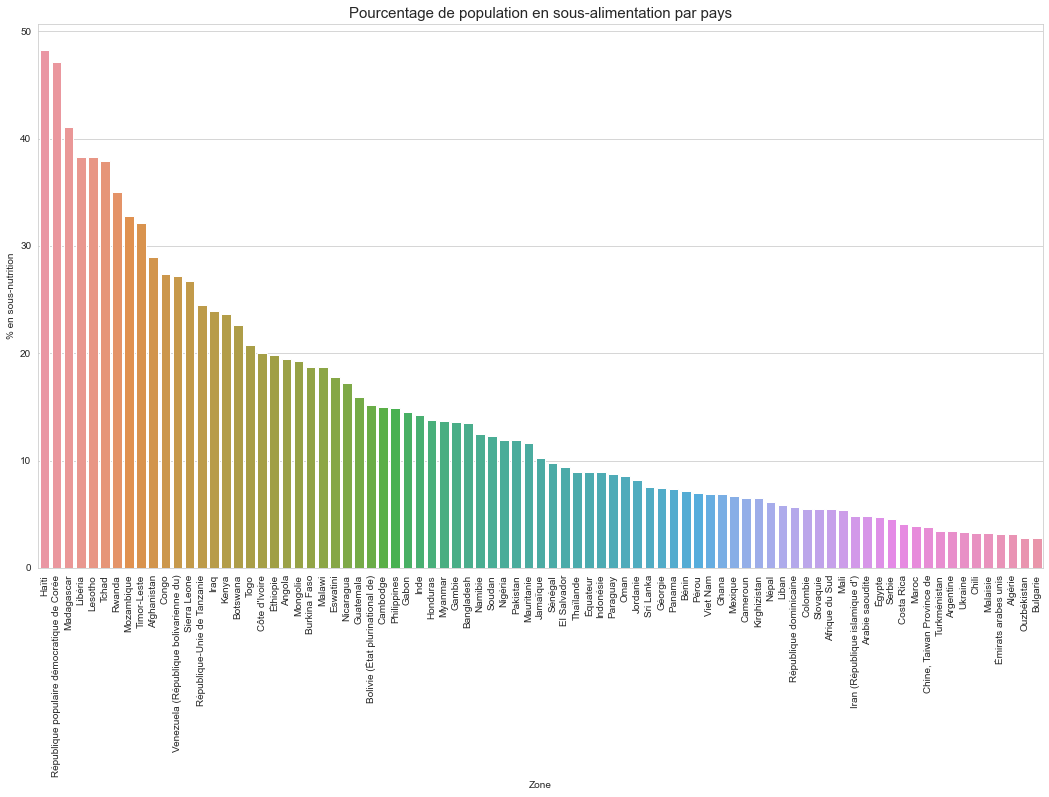

In [84]:
# Visalisation

plt.figure(figsize=(18,10))
sns.set_style('whitegrid')
sns.barplot(x = 'Zone', y = '% en sous-nutrition', 
            data = population_malnutrition.sort_values(by="% en sous-nutrition", ascending=False))
plt.xticks(rotation=90)
plt.title("Pourcentage de population en sous-alimentation par pays", size= 15);

### Pays bénéficiaires d'aide

In [85]:
## Bénéficiaire d’aides depuis 2013

pays_group = aide[["Pays bénéficiaire","Valeur"]].groupby("Pays bénéficiaire").sum().sort_values(by="Valeur", ascending = False)
pays_group

,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


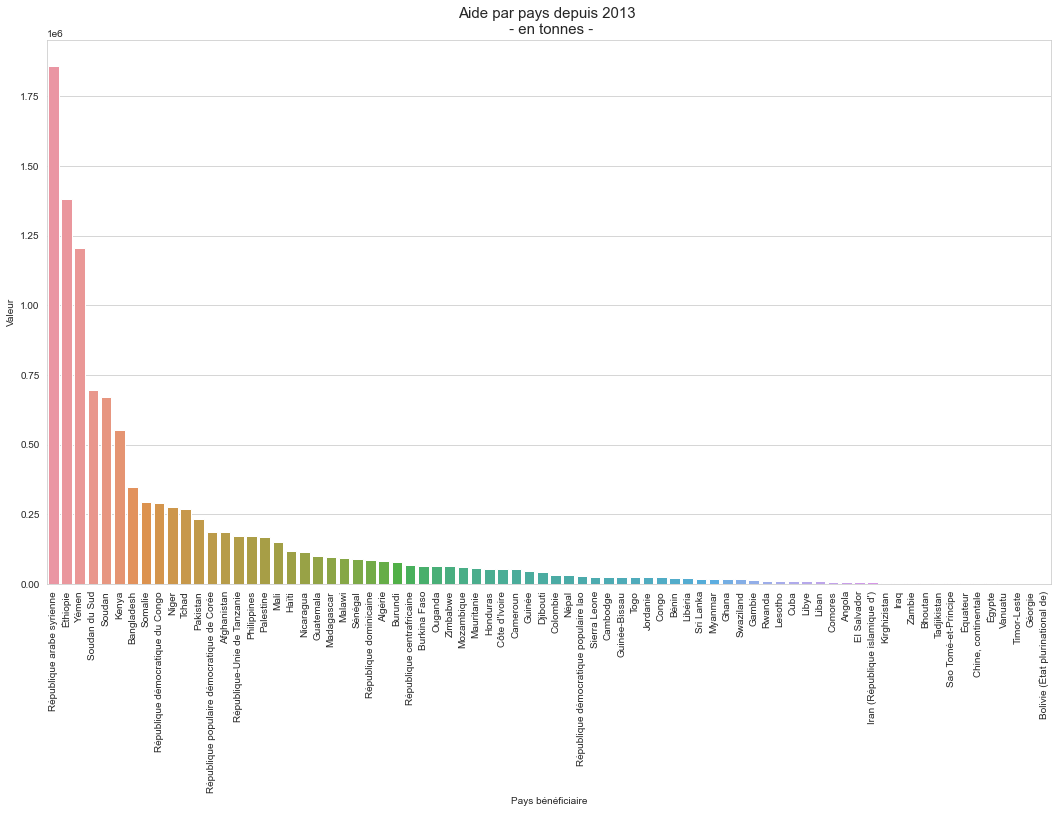

In [86]:
## Visualisation

plt.figure(figsize=(18,10))
sns.set_style("whitegrid")
sns.barplot(x = pays_group.index, y = "Valeur", data = pays_group)
plt.title("Aide par pays depuis 2013 \n - en tonnes -", size = 15)
plt.xticks(rotation = 90);

In [87]:
# Million de persoones en sous-nutrition des 10 grands bénéficiaires d'aide

for i in pays_group.head(10).index :
    print(i,':', sous_nutrition[sous_nutrition.Zone == i]["Valeur"].sum())

République arabe syrienne : 0.0
Éthiopie : 136.1
Yémen : 0.0
Soudan du Sud : 0.0
Soudan : 30.4
Kenya : 66.0
Bangladesh : 132.1
Somalie : 0.0
République démocratique du Congo : 0.0
Niger : 0.0


In [88]:
# Top 10 pays bénéficiaires - évoluation dans le temps

grand_beneficiaire = aide[aide["Pays bénéficiaire"].isin(pays_group.index[:10])].groupby(['Pays bénéficiaire','Année']).sum("Valeur").reset_index()
grand_beneficiaire.head()

,Pays bénéficiaire,Année,Valeur
0,Bangladesh,2013,131018
1,Bangladesh,2014,194628
2,Bangladesh,2015,22542
3,Kenya,2013,220966
4,Kenya,2014,217418


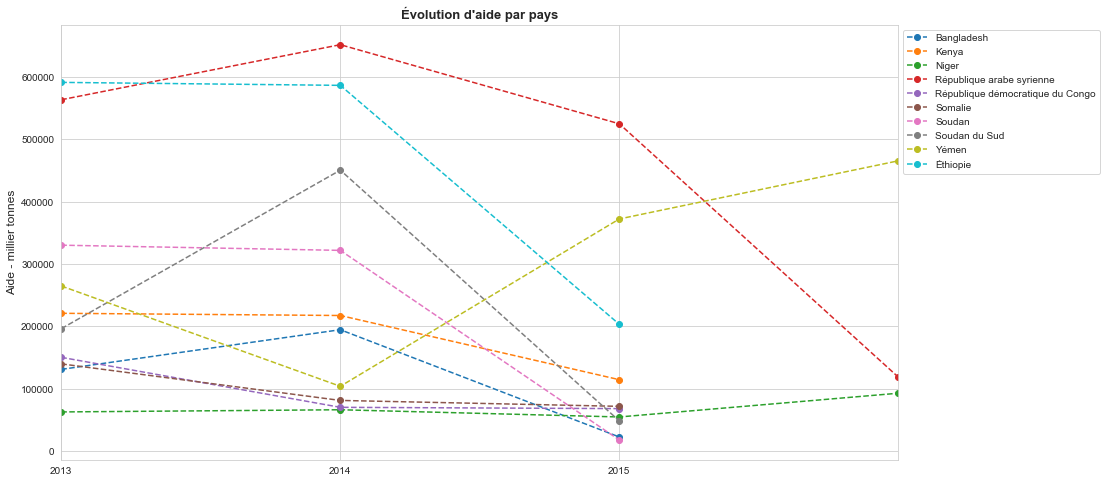

In [89]:
# Visualisation

plt.figure(figsize=(15,8))

for i in grand_beneficiaire['Pays bénéficiaire'].unique():
    tab = grand_beneficiaire[grand_beneficiaire['Pays bénéficiaire']==i]
    plt.plot(tab.Année, tab.Valeur, label = i, marker='o', linestyle='dashed')

plt.legend(bbox_to_anchor=(1, 1))
plt.xlim(2013,2016)
plt.ylabel("Aide - millier tonnes", size=12)
plt.xticks(tab.Année)
plt.title("Évolution d'aide par pays", size = 13, fontweight = "bold");

In [90]:
# Pivot table

pd.pivot_table(aide, values="Valeur", index="Pays bénéficiaire", columns="Année")

Année,2013,2014,2015,2016
Pays bénéficiaire,,,,
Afghanistan,16029.750000,7151.750000,NaN,NaN
Algérie,3203.090909,1898.000000,1742.400000,1184.500000
Angola,2500.000000,7.000000,NaN,NaN
Bangladesh,13101.800000,24328.500000,3220.285714,NaN
Bhoutan,344.800000,73.000000,192.666667,109.000000
Bolivie (État plurinational de),NaN,3.000000,NaN,NaN
Burkina Faso,2068.888889,2548.666667,2575.777778,36.000000
Burundi,5930.222222,1572.857143,1617.000000,NaN
Bénin,3524.400000,224.000000,631.000000,72.000000


### Disponibilité alimentaire par habitant de chaque pays

In [91]:
# Disponibilité alimentaire par habitant

dispo_alimentaire_habitant = dispo_alimentaire[["Zone","Produit","Disponibilité alimentaire (Kcal/personne/jour)"]].groupby('Zone').sum("Disponibilité alimentaire(Kcal/personne/jour)").sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)")
dispo_alimentaire_habitant

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


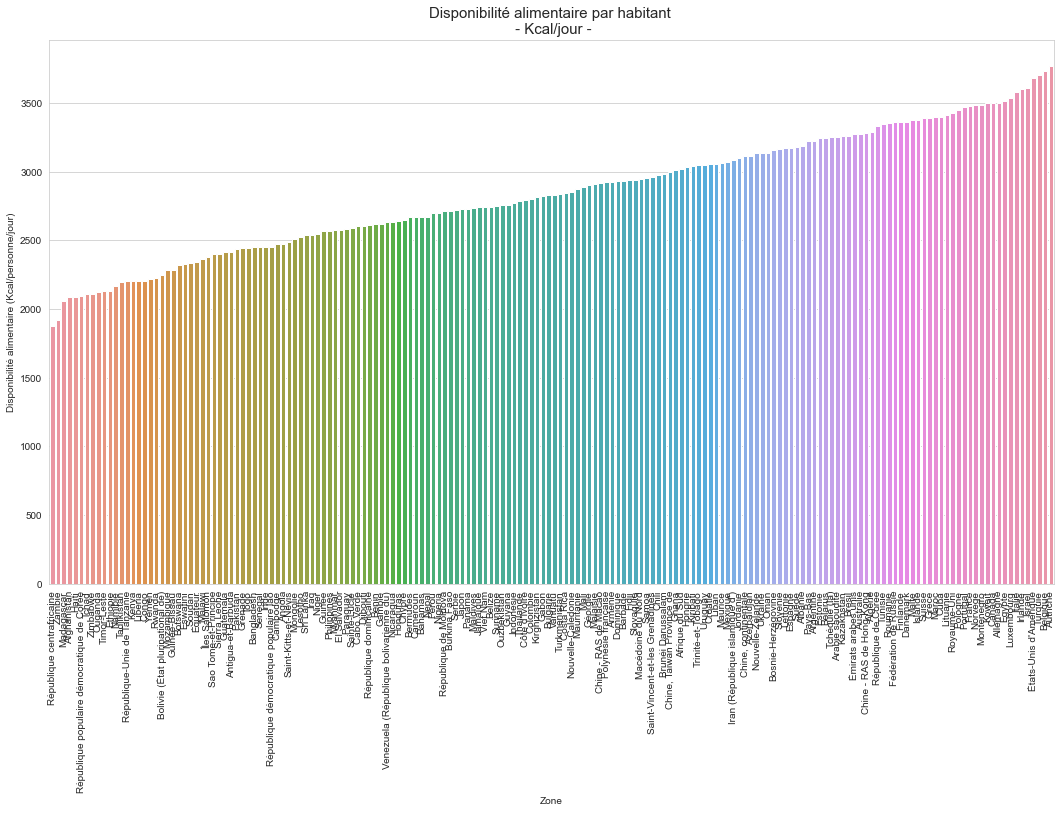

In [92]:
# Visualisation

plt.figure(figsize=(18,10))
sns.set_style("whitegrid")
sns.barplot(x = dispo_alimentaire_habitant.index, y = "Disponibilité alimentaire (Kcal/personne/jour)",
           data = dispo_alimentaire_habitant)
plt.xticks(rotation = 90)
plt.title("Disponibilité alimentaire par habitant \n - Kcal/jour -", size = 15);

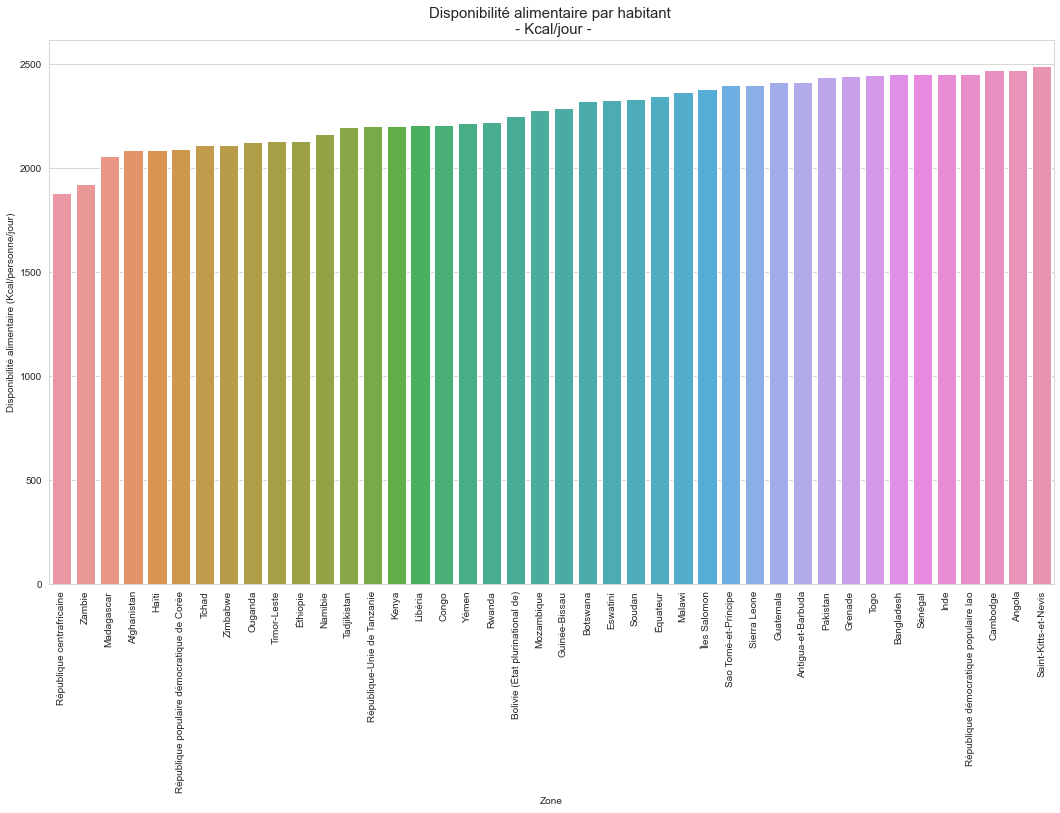

In [93]:
# Visualisation - moins de 2500 kcal/personne/jour

plt.figure(figsize=(18,10))
sns.set_style("whitegrid")
sns.barplot(x = dispo_alimentaire_habitant[dispo_alimentaire_habitant['Disponibilité alimentaire (Kcal/personne/jour)']<2500].index, 
            y = "Disponibilité alimentaire (Kcal/personne/jour)",
            data = dispo_alimentaire_habitant[dispo_alimentaire_habitant['Disponibilité alimentaire (Kcal/personne/jour)']<2500])
plt.xticks(rotation = 90)
plt.title("Disponibilité alimentaire par habitant \n - Kcal/jour -", size = 15);

In [94]:
# Tranche des besoins alimentaires

print("Les besoins énergetiques alimentaire sont compris entre {}Kcal - {}Kcal."
      .format(int(dispo_alimentaire_habitant["Disponibilité alimentaire (Kcal/personne/jour)"].min()),
              int(dispo_alimentaire_habitant["Disponibilité alimentaire (Kcal/personne/jour)"].max())))

Les besoins énergetiques alimentaire sont compris entre 1879Kcal - 3770Kcal.


In [95]:
# Disponibilité almentaire vs besoin alimentaire

dispo_besoin = pd.merge(dispo_alimentaire[["Zone","Disponibilité alimentaire (Kcal/personne/jour)"]].groupby("Zone").sum("Disponibilité alimentaire (Kcal/personne/jour"),
                        besoin_alimentaire_moyen[["Zone","Valeur"]], on = "Zone")
dispo_besoin["Difference"] = dispo_besoin["Disponibilité alimentaire (Kcal/personne/jour)"] - dispo_besoin.Valeur
dispo_besoin

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Valeur,Difference
0,Afghanistan,2087.0,2134.0,-47.0
1,Afrique du Sud,3020.0,2406.0,614.0
2,Albanie,3188.0,2490.0,698.0
3,Algérie,3293.0,2289.0,1004.0
4,Allemagne,3503.0,2545.0,958.0
5,Angola,2474.0,2105.0,369.0
6,Antigua-et-Barbuda,2416.0,2449.0,-33.0
7,Arabie saoudite,3255.0,2419.0,836.0
8,Argentine,3226.0,2412.0,814.0
9,Arménie,2924.0,2433.0,491.0


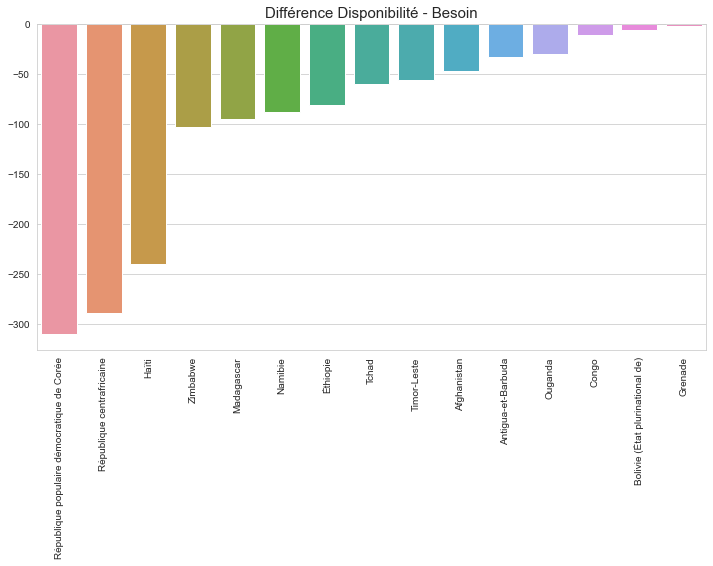

In [96]:
# Visualisation - pays en carence par rapport à leurs besoins énergetiques alimentaires

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.barplot(x = "Zone", y = "Difference", 
            data = dispo_besoin[dispo_besoin["Difference"]<0].sort_values("Difference"))
plt.title("Différence Disponibilité - Besoin", size = 15)
plt.ylabel("")
plt.xlabel("")
plt.xticks(rotation = 90);

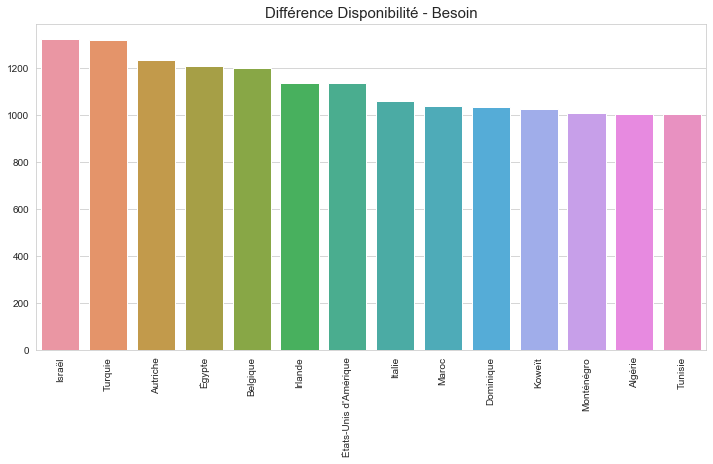

In [97]:
# Visualisation - pays en excès plus de 1000 kcal par rapport à leurs besoins énergetiques alimentaires

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.barplot(x = "Zone", y = "Difference", 
            data = dispo_besoin[dispo_besoin["Difference"]>1000].sort_values("Difference", ascending = False))
plt.title("Différence Disponibilité - Besoin", size = 15)
plt.ylabel("")
plt.xlabel("")
plt.xticks(rotation = 90);